# One sample analysis

## üß¨ Overview
### In this analysis, I‚Äôve used one of the Squidpy demo samples, so you can easily grab the same one and give it a try yourself! üß†‚ú®

In [ ]:
import os
import numpy as np
import scanpy as sc
import pandas as pd
import squidpy as sq
import spatools as st
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
adata = sq.datasets.visium_hne_adata()

In [4]:
adata

AnnData object with n_obs √ó n_vars = 2688 √ó 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

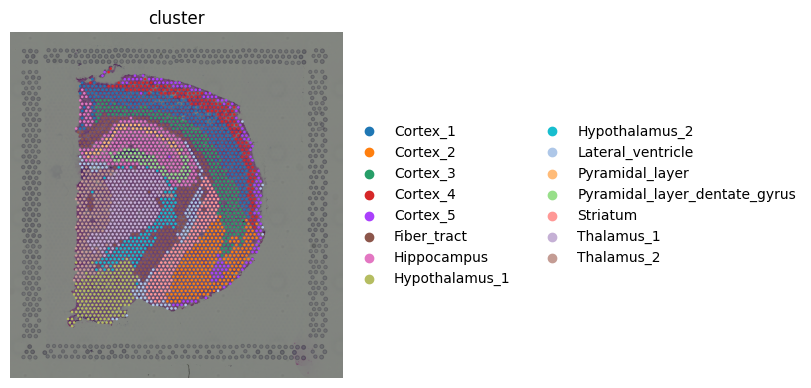

In [26]:
import matplotlib.pyplot as plt

sq.pl.spatial_scatter(adata, color="cluster", frameon=False, figsize=(8,8))# type: ignore

In [6]:
adata.obs["cluster"]

AAACAAGTATCTCCCA-1             Cortex_2
AAACAATCTACTAGCA-1             Cortex_5
AAACACCAATAACTGC-1           Thalamus_2
AAACAGAGCGACTCCT-1             Cortex_5
AAACCGGGTAGGTACC-1           Thalamus_2
                            ...        
TTGTTGTGTGTCAAGA-1    Lateral_ventricle
TTGTTTCACATCCAGG-1       Hypothalamus_1
TTGTTTCATTAGTCTA-1       Hypothalamus_1
TTGTTTCCATACAACT-1           Thalamus_2
TTGTTTGTGTAAATTC-1             Cortex_4
Name: cluster, Length: 2688, dtype: category
Categories (15, object): ['Cortex_1', 'Cortex_2', 'Cortex_3', 'Cortex_4', ..., 'Pyramidal_layer_dentate_gyrus', 'Striatum', 'Thalamus_1', 'Thalamus_2']

In [7]:
adata = correlate_distances(adata, is_concatenated=False, cluster_col="cluster")

In [8]:
type(adata.obsm["spatial"])

numpy.ndarray

In [9]:
adata.obsm["spatial"]

array([[8230, 7237],
       [4170, 1611],
       [2519, 8315],
       ...,
       [3276, 8435],
       [3069, 6639],
       [4720, 2090]])

In [10]:
adata.uns["spatools"]

x     y point_name     color  x_neigh  y_neigh color_neigh  \
0      8230  7237  8230_7237  Cortex_2     8367     7237    Cortex_5   
1      8230  7237  8230_7237  Cortex_2     8161     7357    Cortex_2   
2      8230  7237  8230_7237  Cortex_2     8092     7237    Cortex_2   
3      8230  7237  8230_7237  Cortex_2     8298     7357    Cortex_5   
4      8230  7237  8230_7237  Cortex_2     8161     7118    Cortex_2   
...     ...   ...        ...       ...      ...      ...         ...   
15575  4720  2090  4720_2090  Cortex_4     4858     2090    Cortex_1   
15576  4720  2090  4720_2090  Cortex_4     4651     2209    Cortex_1   
15577  4720  2090  4720_2090  Cortex_4     4789     1970    Cortex_4   
15578  4720  2090  4720_2090  Cortex_4     4651     1970    Cortex_4   
15579  4720  2090  4720_2090  Cortex_4     4789     2209    Cortex_1   

         distance           combination  
0      137.000000  (Cortex_2, Cortex_5)  
1      138.423264  (Cortex_2, Cortex_2)  
2      138.000000  (Cortex_2, Cortex_2)  
3      137.927517  (Cortex_2, Cortex_5)  
4      137.557261  (Cortex_2, Cortex_2)  
...           ...                   ...  
15575  138.000000  (Cortex_1, Cortex_4)  
15576  137.557261  (Cortex_1, Cortex_4)  
15577  138.423264  (Cortex_4, Cortex_4)  
15578  138.423264  (Cortex_4, Cortex_4)  
15579  137.557261  (Cortex_1, Cortex_4)  

[15580 rows x 9 columns]

In [11]:
from spatools.tools.tl import z_score

adata = z_score(adata)

/media/SATA/spatools/spatools/tools/tl.py:560: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z_matrix.fillna(0, inplace=True)


In [12]:
adata.uns["zscore_matrix"]["sample"]

Cortex_1   Cortex_2   Cortex_3   Cortex_4  \
Cortex_1                        0.000000  -6.001364  31.667341  30.016554   
Cortex_2                       -6.001364   0.000000  15.280089  -2.757309   
Cortex_3                       31.667341  15.280089   0.000000  -6.962526   
Cortex_4                       30.016554  -2.757309  -6.962526   0.000000   
Cortex_5                       -5.576356  25.329224  -6.127932  38.816777   
Fiber_tract                    -8.200633  -7.597942   9.725591  -8.426579   
Hippocampus                     0.706459  -7.257411  -7.924944  -8.047658   
Hypothalamus_1                 -3.886326  -3.253869  -3.862013  -3.603518   
Hypothalamus_2                 -6.705850  -5.607779  -6.663564  -6.214347   
Lateral_ventricle              -6.679076  -3.057729  -6.636962  -6.189577   
Pyramidal_layer                -4.820076  -4.034336  -4.789856  -4.468630   
Pyramidal_layer_dentate_gyrus  -4.708580  -3.941184  -4.679067  -4.365351   
Striatum                       -5.619295  18.834638   0.917617  -5.208752   
Thalamus_1                     -5.697919  -4.767300  -5.662108  -5.281543   
Thalamus_2                     -5.650871  -4.728038  -5.615361  -5.237986   

                                Cortex_5  Fiber_tract  Hippocampus  \
Cortex_1                       -5.576356    -8.200633     0.706459   
Cortex_2                       25.329224    -7.597942    -7.257411   
Cortex_3                       -6.127932     9.725591    -7.924944   
Cortex_4                       38.816777    -8.426579    -8.047658   
Cortex_5                        0.000000    -8.143092    -6.209056   
Fiber_tract                    -8.143092     0.000000     7.636525   
Hippocampus                    -6.209056     7.636525     0.000000   
Hypothalamus_1                 -3.484070    -1.645142    -4.457188   
Hypothalamus_2                 -6.006999    14.656462    -4.269990   
Lateral_ventricle               0.767455    13.256713     1.337737   
Pyramidal_layer                -4.320240    -5.439155    41.147292   
Pyramidal_layer_dentate_gyrus  -4.220425    -5.653609    33.408617   
Striatum                       -5.035467     6.145835    -6.449247   
Thalamus_1                     -5.105801     3.509804    -5.611606   
Thalamus_2                     -5.063715     0.369816    -6.485585   

                               Hypothalamus_1  Hypothalamus_2  \
Cortex_1                            -3.886326       -6.705850   
Cortex_2                            -3.253869       -5.607779   
Cortex_3                            -3.862013       -6.663564   
Cortex_4                            -3.603518       -6.214347   
Cortex_5                            -3.484070       -6.006999   
Fiber_tract                         -1.645142       14.656462   
Hippocampus                         -4.457188       -4.269990   
Hypothalamus_1                       0.000000       14.578076   
Hypothalamus_2                      14.578076        0.000000   
Lateral_ventricle                    7.656675       -3.538881   
Pyramidal_layer                     -2.485268       -4.278127   
Pyramidal_layer_dentate_gyrus       -2.428035        0.628905   
Striatum                            -2.894960       -4.986294   
Thalamus_1                          -2.935207       20.436627   
Thalamus_2                          17.058302       10.647590   

                               Lateral_ventricle  Pyramidal_layer  \
Cortex_1                               -6.679076        -4.820076   
Cortex_2                               -3.057729        -4.034336   
Cortex_3                               -6.636962        -4.789856   
Cortex_4                               -6.189577        -4.468630   
Cortex_5                                0.767455        -4.320240   
Fiber_tract                            13.256713        -5.439155   
Hippocampus                             1.337737        41.147292   
Hypothalamus_1                          7.656675        -2.485268   
Hypothalamus_2  

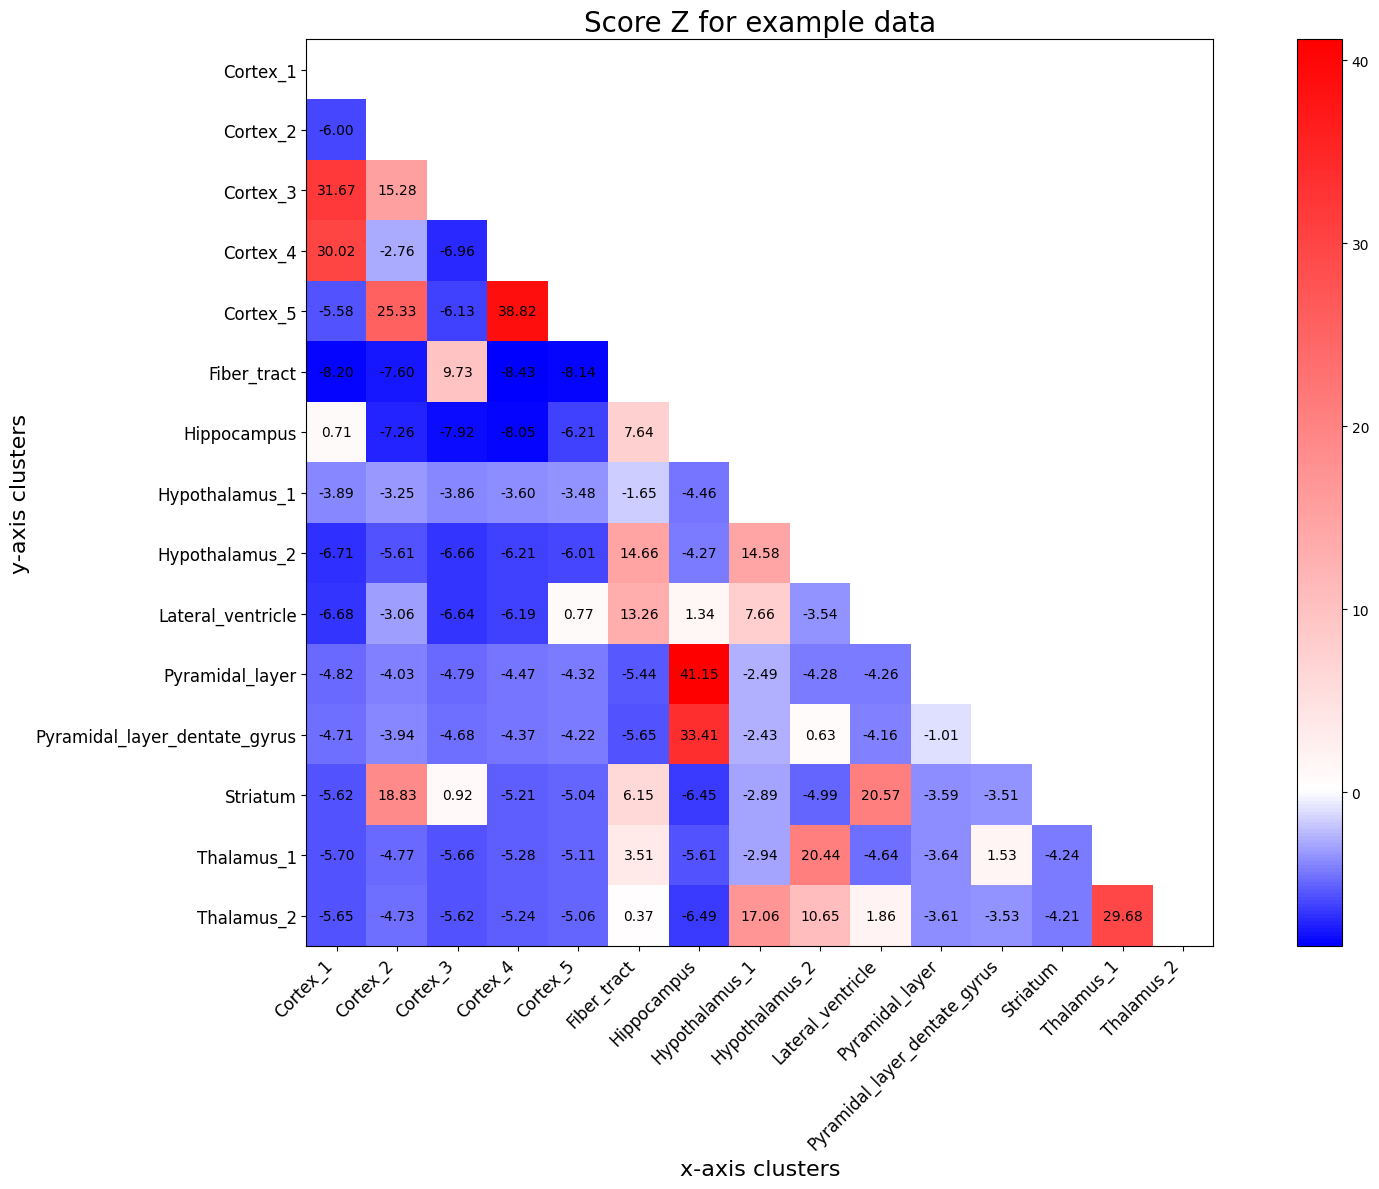

Cortex_1   Cortex_2   Cortex_3   Cortex_4  \
Cortex_1                        0.000000  -6.001364  31.667341  30.016554   
Cortex_2                       -6.001364   0.000000  15.280089  -2.757309   
Cortex_3                       31.667341  15.280089   0.000000  -6.962526   
Cortex_4                       30.016554  -2.757309  -6.962526   0.000000   
Cortex_5                       -5.576356  25.329224  -6.127932  38.816777   
Fiber_tract                    -8.200633  -7.597942   9.725591  -8.426579   
Hippocampus                     0.706459  -7.257411  -7.924944  -8.047658   
Hypothalamus_1                 -3.886326  -3.253869  -3.862013  -3.603518   
Hypothalamus_2                 -6.705850  -5.607779  -6.663564  -6.214347   
Lateral_ventricle              -6.679076  -3.057729  -6.636962  -6.189577   
Pyramidal_layer                -4.820076  -4.034336  -4.789856  -4.468630   
Pyramidal_layer_dentate_gyrus  -4.708580  -3.941184  -4.679067  -4.365351   
Striatum                       -5.619295  18.834638   0.917617  -5.208752   
Thalamus_1                     -5.697919  -4.767300  -5.662108  -5.281543   
Thalamus_2                     -5.650871  -4.728038  -5.615361  -5.237986   

                                Cortex_5  Fiber_tract  Hippocampus  \
Cortex_1                       -5.576356    -8.200633     0.706459   
Cortex_2                       25.329224    -7.597942    -7.257411   
Cortex_3                       -6.127932     9.725591    -7.924944   
Cortex_4                       38.816777    -8.426579    -8.047658   
Cortex_5                        0.000000    -8.143092    -6.209056   
Fiber_tract                    -8.143092     0.000000     7.636525   
Hippocampus                    -6.209056     7.636525     0.000000   
Hypothalamus_1                 -3.484070    -1.645142    -4.457188   
Hypothalamus_2                 -6.006999    14.656462    -4.269990   
Lateral_ventricle               0.767455    13.256713     1.337737   
Pyramidal_layer                -4.320240    -5.439155    41.147292   
Pyramidal_layer_dentate_gyrus  -4.220425    -5.653609    33.408617   
Striatum                       -5.035467     6.145835    -6.449247   
Thalamus_1                     -5.105801     3.509804    -5.611606   
Thalamus_2                     -5.063715     0.369816    -6.485585   

                               Hypothalamus_1  Hypothalamus_2  \
Cortex_1                            -3.886326       -6.705850   
Cortex_2                            -3.253869       -5.607779   
Cortex_3                            -3.862013       -6.663564   
Cortex_4                            -3.603518       -6.214347   
Cortex_5                            -3.484070       -6.006999   
Fiber_tract                         -1.645142       14.656462   
Hippocampus                         -4.457188       -4.269990   
Hypothalamus_1                       0.000000       14.578076   
Hypothalamus_2                      14.578076        0.000000   
Lateral_ventricle                    7.656675       -3.538881   
Pyramidal_layer                     -2.485268       -4.278127   
Pyramidal_layer_dentate_gyrus       -2.428035        0.628905   
Striatum                            -2.894960       -4.986294   
Thalamus_1                          -2.935207       20.436627   
Thalamus_2                          17.058302       10.647590   

                               Lateral_ventricle  Pyramidal_layer  \
Cortex_1                               -6.679076        -4.820076   
Cortex_2                               -3.057729        -4.034336   
Cortex_3                               -6.636962        -4.789856   
Cortex_4                               -6.189577        -4.468630   
Cortex_5                                0.767455        -4.320240   
Fiber_tract                            13.256713        -5.439155   
Hippocampus                             1.337737        41.147292   
Hypothalamus_1                          7.656675        -2.485268   
Hypothalamus_2  

In [13]:
from spatools.plotting.pl import z_score_matrixplot

z_score_matrixplot(adata, show=True,
              title="Score Z for example data",
              return_object=True
              )

In [24]:
adata.uns["z-score"]["sample"]

combination  count  proportion_observed  \
0                           (Cortex_1, Cortex_2)    2.0             0.000543   
1                           (Cortex_1, Cortex_3)  290.0             0.078762   
2                           (Cortex_1, Cortex_4)  256.0             0.069527   
3                           (Cortex_1, Cortex_5)    8.0             0.002173   
4                        (Cortex_1, Fiber_tract)    8.0             0.002173   
..                                           ...    ...                  ...   
100  (Pyramidal_layer_dentate_gyrus, Thalamus_1)   18.0             0.004889   
101  (Pyramidal_layer_dentate_gyrus, Thalamus_2)    0.0             0.000000   
102                       (Striatum, Thalamus_1)    0.0             0.000000   
103                       (Striatum, Thalamus_2)    0.0             0.000000   
104                     (Thalamus_1, Thalamus_2)  144.0             0.039109   

     proportion_expected   std_dev    Z_score  
0               0.010736  0.001698  -6.001364  
1               0.015106  0.002010  31.667341  
2               0.013158  0.001878  30.016554  
3               0.012303  0.001817  -5.576356  
4               0.021994  0.002417  -8.200633  
..                   ...       ...        ...  
100             0.003420  0.000962   1.526232  
101             0.003364  0.000954  -3.525571  
102             0.004859  0.001146  -4.240003  
103             0.004780  0.001137  -4.205129  
104             0.004913  0.001152  29.676169  

[105 rows x 6 columns]

In [25]:
adata.uns["stats"]

sample_key                               Cluster Pair  Correlation  \
0      sample                       Cortex_1-Fiber_tract    -8.200633   
1      sample                       Cortex_2-Fiber_tract    -7.597942   
2      sample                       Cortex_3-Fiber_tract     9.725591   
3      sample                       Cortex_4-Fiber_tract    -8.426579   
4      sample                       Cortex_5-Fiber_tract    -8.143092   
5      sample                    Fiber_tract-Hippocampus     7.636525   
6      sample                 Fiber_tract-Hypothalamus_1    -1.645142   
7      sample                 Fiber_tract-Hypothalamus_2    14.656462   
8      sample              Fiber_tract-Lateral_ventricle    13.256713   
9      sample                Fiber_tract-Pyramidal_layer    -5.439155   
10     sample  Fiber_tract-Pyramidal_layer_dentate_gyrus    -5.653609   
11     sample                       Fiber_tract-Striatum     6.145835   
12     sample                     Fiber_tract-Thalamus_1     3.509804   
13     sample                     Fiber_tract-Thalamus_2     0.369816   

            pval      FDR_pval  significant  
0   2.391240e-16  6.695472e-16         True  
1   3.008769e-14  5.265346e-14         True  
2   2.345404e-22  1.094522e-21         True  
3   3.559177e-17  1.245712e-16         True  
4   3.853094e-16  8.990553e-16         True  
5   2.231627e-14  4.463254e-14         True  
6   9.994044e-02  1.076282e-01        False  
7   1.224920e-48  1.714889e-47         True  
8   4.125846e-40  2.888092e-39         True  
9   5.353399e-08  6.813417e-08         True  
10  1.571132e-08  2.199585e-08         True  
11  7.954418e-10  1.237354e-09         True  
12  4.484378e-04  5.231775e-04         True  
13  7.115198e-01  7.115198e-01        False

# Multi-sample analysis

## üß¨ Overview
### In this analysis I've used a sample from my project in which there are good, bad and partial responders.
## ‚ö†Ô∏è Note:
### The following steps should be repeated for all three categories.

In [ ]:
import os
import numpy as np
import scanpy as sc
import pandas as pd
import spatools as st 
import matplotlib as mpl
import matplotlib.pyplot as plt

adata = sc.read(os.path.join(os.getcwd(), "data", "scvi_non_5000_unique.h5ad"))
adata = st.tl.correlate_distances(adata, is_concatenated=True, cluster_col="clusters_0.6", batch_key="batch")

In [2]:
type(adata.obsm["spatial"])

numpy.ndarray

In [3]:
adata.obsm["spatial"]

array([[4126, 1601],
       [3144, 6006],
       [4051, 7137],
       ...,
       [5550, 5962],
       [5280, 4325],
       [5745, 4028]])

In [4]:
from spatools.tools.tl import z_score

adata.uns["spatools"]["response"] = adata.uns["spatools"]["batch"].str.split("_").str[1]

adata = z_score(adata, filter_column="response", filter_value="GOR")

/media/SATA/spatools/spatools/tools/tl.py:560: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z_matrix.fillna(0, inplace=True)
/media/SATA/spatools/spatools/tools/tl.py:560: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z_matrix.fillna(0, inplace=True)
/media/SATA/spatools/spatools/tools/tl.py:560: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

In [5]:
adata.uns_keys()

['check_distances',
 'check_spots',
 'clusters_0.6_colors',
 'hvg',
 'log1p',
 'neighbors',
 'pca',
 'pearson_residuals_normalization',
 'response_colors',
 'spatial',
 'spatools',
 't-test',
 'umap',
 'z-score',
 'zscore_matrix']

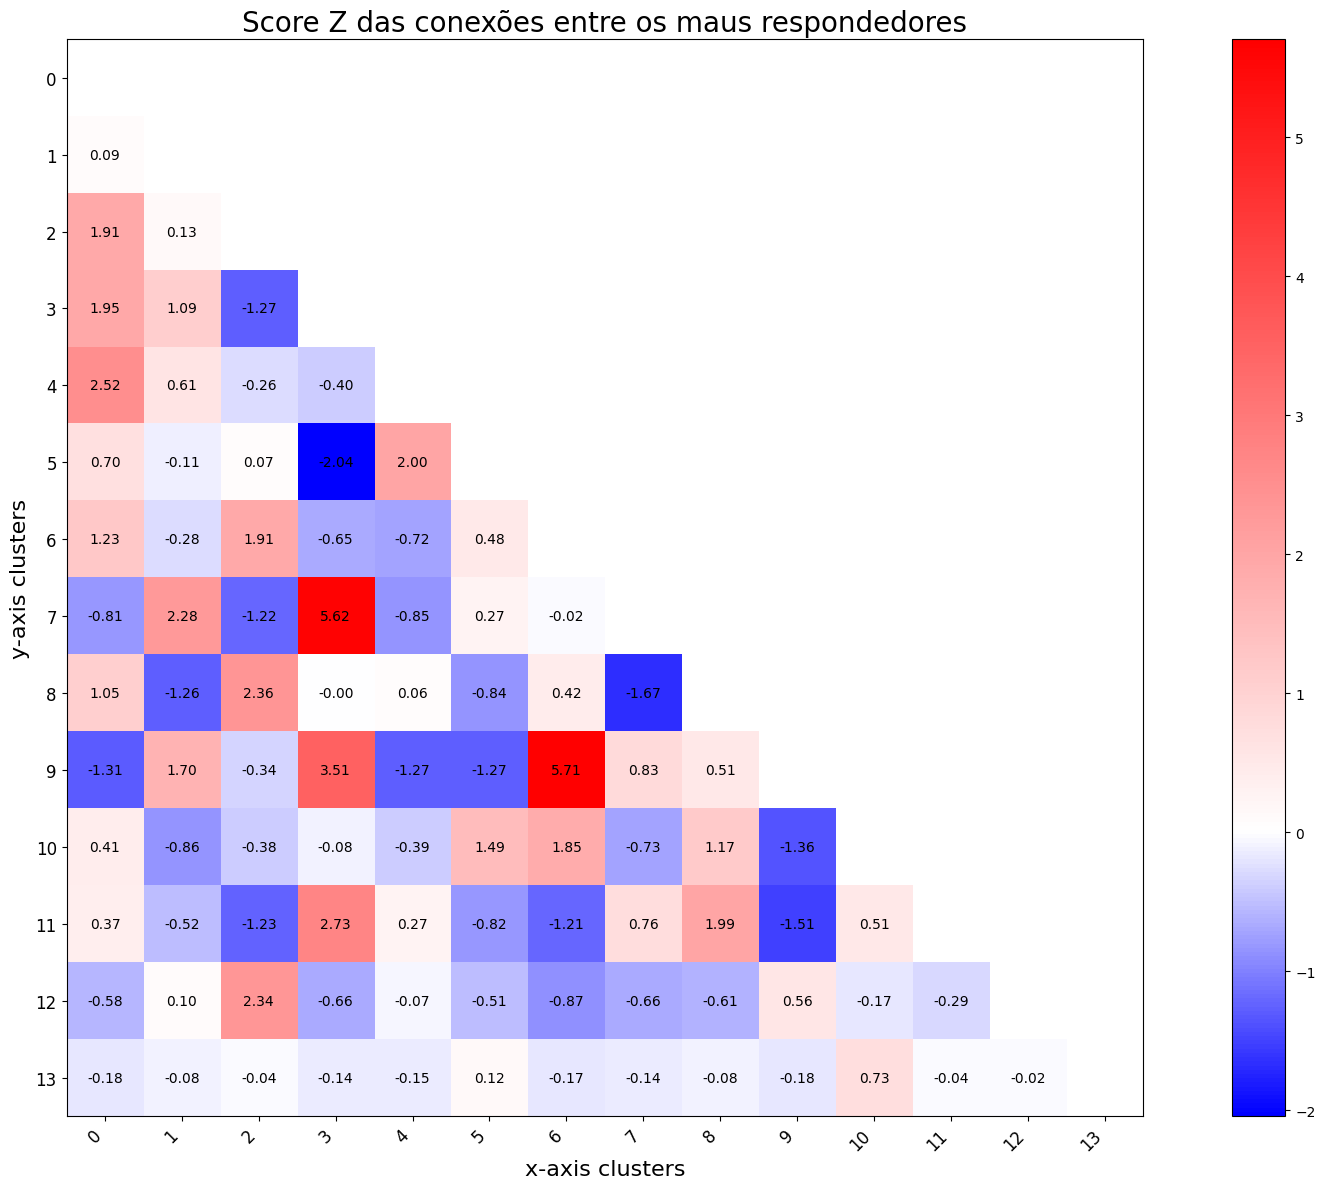

0         1         2         3         4         5         6   \
0   0.000000  0.086527  1.905369  1.953057  2.520662  0.701963  1.227249   
1   0.086527  0.000000  0.131444  1.091776  0.606701 -0.110440 -0.281139   
2   1.905369  0.131444  0.000000 -1.266200 -0.260859  0.065248  1.907279   
3   1.953057  1.091776 -1.266200  0.000000 -0.404091 -2.040805 -0.654802   
4   2.520662  0.606701 -0.260859 -0.404091  0.000000  1.996779 -0.716166   
5   0.701963 -0.110440  0.065248 -2.040805  1.996779  0.000000  0.483905   
6   1.227249 -0.281139  1.907279 -0.654802 -0.716166  0.483905  0.000000   
7  -0.807746  2.282526 -1.220382  5.624701 -0.846789  0.265446 -0.018581   
8   1.047514 -1.259056  2.362208 -0.000769  0.062862 -0.835951  0.424208   
9  -1.311834  1.695406 -0.338301  3.506809 -1.266633 -1.265925  5.705998   
10  0.405358 -0.858276 -0.380244 -0.084035 -0.387834  1.494561  1.852434   
11  0.374566 -0.519138 -1.227145  2.728587  0.269061 -0.818188 -1.210282   
12 -0.579649  0.100904  2.341512 -0.664489 -0.069365 -0.508341 -0.869907   
13 -0.178694 -0.077593 -0.042345 -0.139578 -0.154000  0.123296 -0.166031   

          7         8         9         10        11        12        13  
0  -0.807746  1.047514 -1.311834  0.405358  0.374566 -0.579649 -0.178694  
1   2.282526 -1.259056  1.695406 -0.858276 -0.519138  0.100904 -0.077593  
2  -1.220382  2.362208 -0.338301 -0.380244 -1.227145  2.341512 -0.042345  
3   5.624701 -0.000769  3.506809 -0.084035  2.728587 -0.664489 -0.139578  
4  -0.846789  0.062862 -1.266633 -0.387834  0.269061 -0.069365 -0.154000  
5   0.265446 -0.835951 -1.265925  1.494561 -0.818188 -0.508341  0.123296  
6  -0.018581  0.424208  5.705998  1.852434 -1.210282 -0.869907 -0.166031  
7   0.000000 -1.668968  0.827165 -0.727302  0.757513 -0.658537 -0.143208  
8  -1.668968  0.000000  0.511680  1.174947  1.985767 -0.613003 -0.084699  
9   0.827165  0.511680  0.000000 -1.356942 -1.510556  0.561591 -0.182252  
10 -0.727302  1.174947 -1.356942  0.000000  0.514611 -0.170764  0.733562  
11  0.757513  1.985767 -1.510556  0.514611  0.000000 -0.294501 -0.039203  
12 -0.658537 -0.613003  0.561591 -0.170764 -0.294501  0.000000 -0.019601  
13 -0.143208 -0.084699 -0.182252  0.733562 -0.039203 -0.019601  0.000000

In [6]:
from spatools.plotting.pl import z_score_matrixplot

z_score_matrixplot(adata, show=True,
              title="Score Z das conex√µes entre os maus respondedores",
              )

In [8]:
samples = adata.uns["zscore_matrix"].keys()

for sample in samples:
    print(sample)

P1_GOR_S2
P2_GOR_S2
P3_GOR_S2
P4_GOR_S1
P5_GOR_S1
P6_GOR_S1
P7_GOR_S1
P8_GOR_S1
P9_GOR_S1


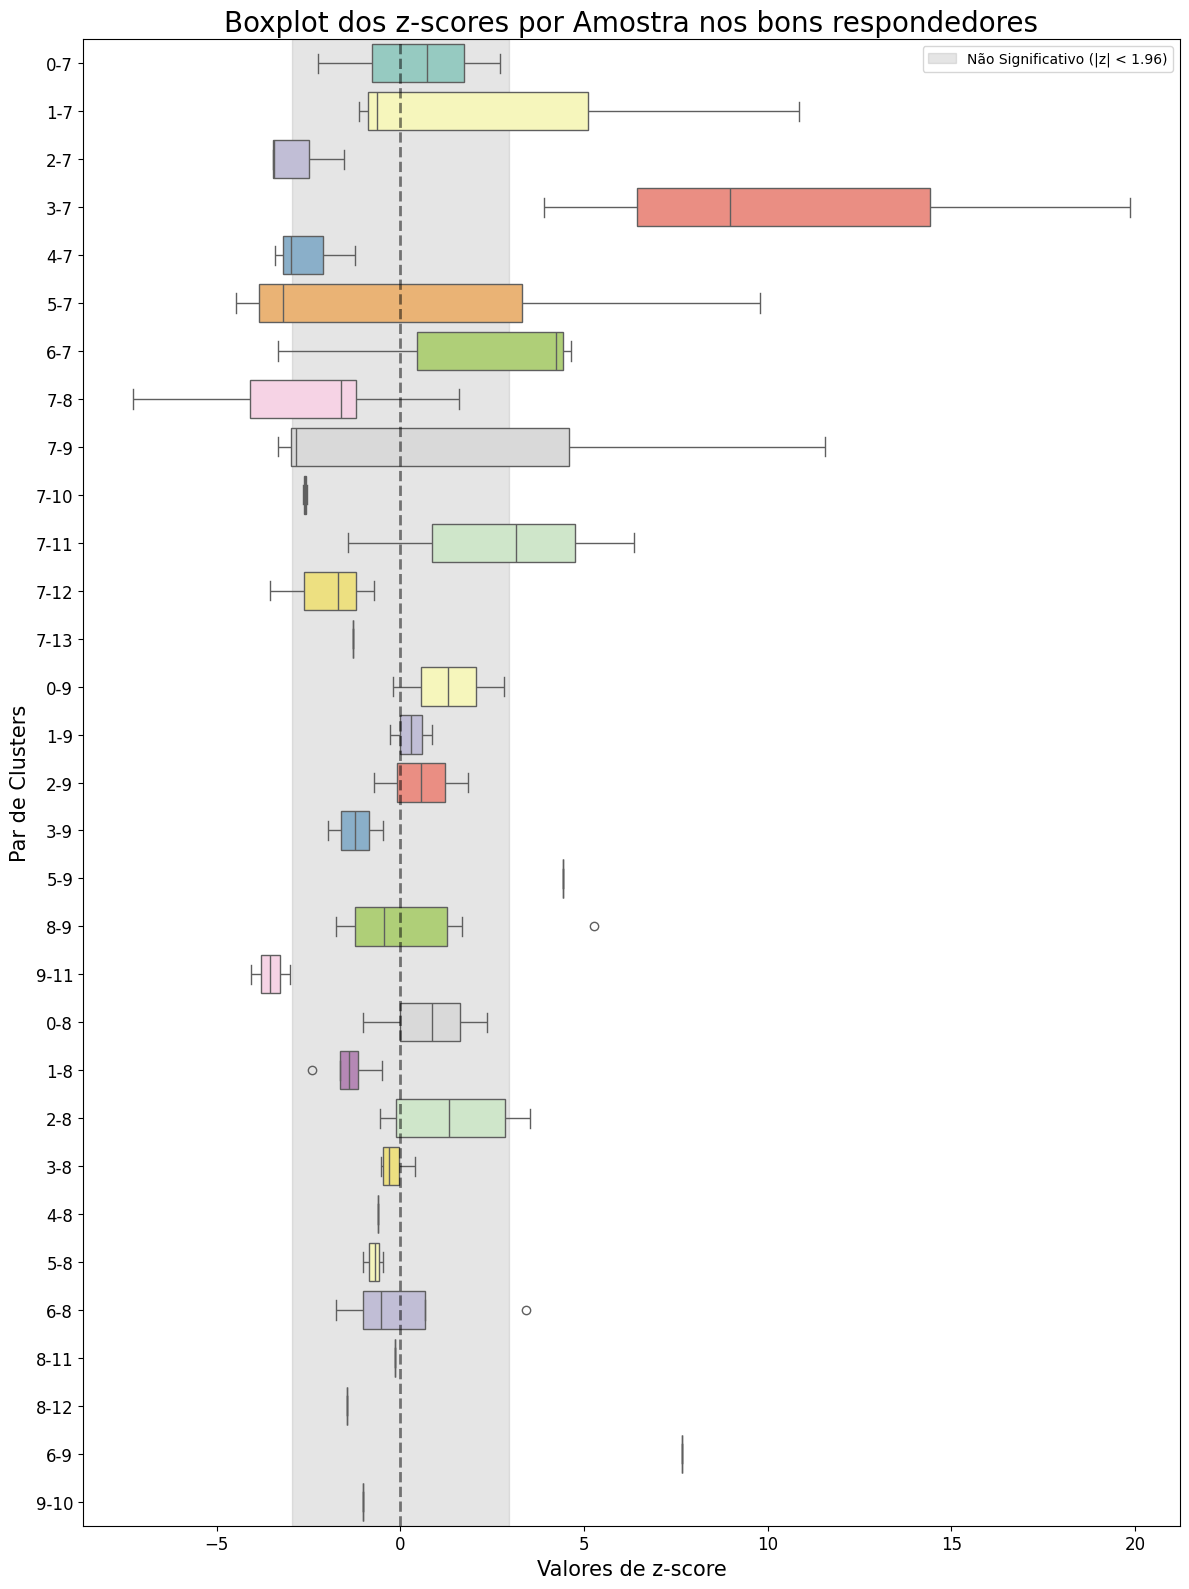

In [9]:
from spatools.plotting.pl import boxplot_cluster_correlations

boxplot_cluster_correlations(adata, cluster_col="clusters_0.6", 
                             show=True, 
                             title="Boxplot dos z-scores por Amostra nos bons respondedores",
                             subset=True,
                             value=7
                             )

In [ ]:
adata.uns["stats"]

Cluster Pair  Correlation          pval      FDR_pval  significant
0           0-7     2.721361  6.501375e-03  1.713999e-02         True
1           1-7    10.863157  1.726740e-27  5.007546e-26         True
2           2-7    -3.443560  5.741095e-04  2.378454e-03         True
3           3-7     3.904873  9.427484e-05  4.824654e-04         True
4           4-7    -1.243709  2.136068e-01  3.260315e-01        False
..          ...          ...           ...           ...          ...
82          4-7     7.669219  1.730462e-14  2.509170e-13         True
83          5-7    -3.320521  8.984956e-04  3.126765e-03         True
84          6-7     0.094859  9.244265e-01  9.351757e-01        False
85          7-8    -1.028631  3.036531e-01  4.380913e-01        False
86          7-9    -2.998777  2.710652e-03  8.422383e-03         True

[87 rows x 5 columns]